## Model with Categorical Variables

In [2]:
import pandas as pd
import numpy as np

In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
df = pd.read_csv( "../datasets/ecom-expense/Ecom Expense.csv" )

In [5]:
df.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485


In [7]:
dummy_gender = pd.get_dummies( df["Gender"], prefix="Gender" )
dummy_city_tier = pd.get_dummies( df["City Tier"], prefix="City" )

In [8]:
dummy_gender.head()

,Gender_Female,Gender_Male
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


In [9]:
dummy_city_tier.head()

,City_Tier 1,City_Tier 2,City_Tier 3
0,1,0,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0


In [10]:
column_names = df.columns.values.tolist()
column_names

['Transaction ID',
 'Age ',
 ' Items ',
 'Monthly Income',
 'Transaction Time',
 'Record',
 'Gender',
 'City Tier',
 'Total Spend']

In [11]:
df_new = df[ column_names ].join( dummy_gender )

In [16]:
column_names = df_new.columns.values.tolist()
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0


In [17]:
df_new = df_new[ column_names ].join( dummy_city_tier )
column_names = df_new.columns.values.tolist()
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0


In [33]:
feature_cols = [ "Monthly Income", "Transaction Time", 
                "Gender_Female", "Gender_Male", "City_Tier 1", 
                "City_Tier 2", "City_Tier 3", "Record" ]

In [34]:
X = df_new[ feature_cols ]
Y = df_new[ "Total Spend" ]

In [35]:
lm = LinearRegression()

In [36]:
lm.fit( X, Y )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [37]:
lm.intercept_

-79.4171303013718

In [38]:
lm.coef_

array([ 1.47538980e-01,  1.54946125e-01, -1.31025013e+02,  1.31025013e+02,
        7.67643260e+01,  5.51389743e+01, -1.31903300e+02,  7.72233446e+02])

In [39]:
list( zip( feature_cols, lm.coef_ ) )

[('Monthly Income', 0.14753898049205738),
 ('Transaction Time', 0.15494612549589634),
 ('Gender_Female', -131.02501325554624),
 ('Gender_Male', 131.02501325554607),
 ('City_Tier 1', 76.76432601049513),
 ('City_Tier 2', 55.1389743092325),
 ('City_Tier 3', -131.9033003197277),
 ('Record', 772.2334457445645)]

In [40]:
lm.score(X,Y) # R2

0.9179923586131016

The model can be written as:
    Total_Spend = -79.4171303013718 + (0.14753898049205738 x Monthly Income) + (0.15494612549589634 x Transaction Time) + (-131.02501325554624 x Gender_Female) + (131.02501325554607 x Gender_Male) + (76.76432601049513 x City_Tier 1) + (55.1389743092325 x City_Tier 2) + (-131.9033003197277 x City_Tier 3) + (772.2334457445645 x Record)
    
**We will actually have 6 different models considering the different permutations between Gender and City Tier**

In [59]:
df_new["Prediction"] = -79.4171303013718 + (0.14753898049205738 * df_new["Monthly Income"]) + (0.15494612549589634 * df_new["Transaction Time"]) + (-131.02501325554624 * df_new["Gender_Female"]) + (131.02501325554607 * df_new["Gender_Male"]) + (76.76432601049513 * df_new["City_Tier 1"]) + (55.1389743092325 * df_new["City_Tier 2"]) + (-131.9033003197277 * df_new["City_Tier 3"]) + (772.2334457445645 * df_new["Record"])

# Or doing: df_new["prediction"] = lm.predict( pd.DataFrame(df_new[feature_cols]) )

In [60]:
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3,Prediction
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0,4903.696720
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0,4799.434826
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0,5157.082504
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0,8068.012996
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0,3581.980335


In [53]:
SSD = np.sum(( df_new["Prediction"] - df_new["Total Spend"] )**2)
SSD

1517733985.340816

In [54]:
RSE = np.sqrt( SSD / (len( df_new )-len( feature_cols )-1) )
RSE

803.1318809818165

In [55]:
sales_mean = np.mean( df_new["Total Spend"] )
sales_mean

6163.176415976714

In [57]:
error = RSE / sales_mean
error # 13.03% of the model is unexplained

0.13031135680294162

## Eliminating Redundant Dummy Variables

In [80]:
# Case when Gender is Female and City is City Tier 1

dummy_gender = pd.get_dummies( df["Gender"], prefix="Gender" ).iloc[:, 1:]
dummy_gender.head()

,Gender_Male
0,0
1,0
2,1
3,0
4,0


In [67]:
dummy_city_tier = pd.get_dummies( df["City Tier"], prefix="City" ).iloc[:,1:]
dummy_city_tier

,City_Tier 2,City_Tier 3
0,0,0
1,1,0
2,1,0
3,0,0
4,1,0
5,1,0
6,0,0
7,0,1
8,0,0
9,1,0


In [69]:
column_names = df.columns.values.tolist()
df_new = df[ column_names ].join( dummy_gender )
column_names = df_new.columns.values.tolist()
df_new = df_new[ column_names ].join( dummy_city_tier )
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Male,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,0,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,1,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,0,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,0,1,0


In [75]:
feature_cols = [ "Monthly Income", "Transaction Time", 
                "Gender_Male", "City_Tier 2", "City_Tier 3", "Record" ]

In [76]:
X = df_new[ feature_cols ]
Y = df_new[ "Total Spend" ]

In [77]:
lm = LinearRegression()
lm.fit( X, Y )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [78]:
lm.intercept_

-133.67781754642238

In [79]:
list( zip( feature_cols, lm.coef_ ) )

[('Monthly Income', 0.14753898049205744),
 ('Transaction Time', 0.1549461254959002),
 ('Gender_Male', 262.0500265110948),
 ('City_Tier 2', -21.62535170126276),
 ('City_Tier 3', -208.66762633022296),
 ('Record', 772.2334457445636)]

## Variable transformation to get a non-linear relationships

In [81]:
import pandas as pd

In [82]:
data_auto = pd.read_csv( "../datasets/auto/auto-mpg.csv" )

In [83]:
data_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [84]:
data_auto.shape

(406, 9)

In [85]:
import matplotlib.pyplot as plt

Text(0.5,1,'Horsepower vs MPG')

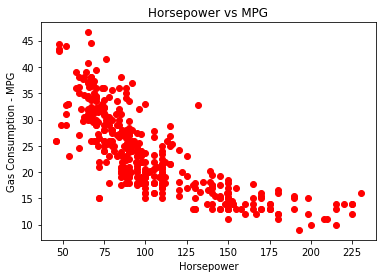

In [91]:
%matplotlib inline
data_auto["mpg"] = data_auto["mpg"].dropna()
data_auto["horsepower"] = data_auto["horsepower"].dropna()
plt.plot( data_auto["horsepower"], data_auto["mpg"], "ro" )
plt.xlabel( "Horsepower" )
plt.ylabel( "Gas Consumption - MPG" )
plt.title( "Horsepower vs MPG" )

### Linear Regression Model

* mpg = a + b x horsepower

In [104]:
X = data_auto["horsepower"].fillna( data_auto["horsepower"].mean() )
Y = data_auto["mpg"].fillna( data_auto["mpg"].mean() )
X_data = X[ :, np.newaxis ]

In [106]:
lm = LinearRegression()
lm.fit( X_data, Y )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

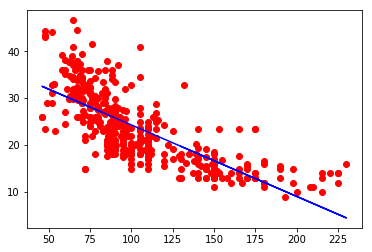

In [107]:
%matplotlib inline
plt.plot( X, Y, "ro" )
plt.plot( X, lm.predict( X_data ), color="blue" )

In [109]:
lm.score( X_data, Y )

0.574653340645025

In [111]:
SSD = np.sum( (Y - lm.predict( X_data ) )**2 )
SSD

10315.75196006092

In [121]:
RSE = np.sqrt( SSD / (len( X_data )-1) )
RSE # Std Dev - 5.047 Gallons up and down

5.046879480825511

In [122]:
y_mean = np.mean( Y )
y_mean # 23.51 Miles per gallon

23.51457286432162

In [120]:
error = RSE / y_mean
error # 21.46% remains unexplained

0.21462773361633458

## Quadratic regression model

* mpg = a + b x horsepower^2

In [130]:
X_data = X**2
X_data = X_data[ :, np.newaxis ]

In [131]:
lm = LinearRegression()

In [132]:
lm.fit( X_data, Y )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [133]:
lm.score( X_data, Y )

0.4849887034823205

In [135]:
SSD = np.sum( (Y - lm.predict( X_data ) )**2 )
RSE = np.sqrt( SSD / (len( X_data )-1) )
y_mean = np.mean( Y )
error = RSE / y_mean # 23.62% remains unexplained - The model is no better

SSD, RSE, y_mean, error

(12490.350340501926, 5.553410772769817, 23.51457286432162, 0.236168898529981)

## Combined regression model ( Linear - Quadratic)
mpg = a + b **x** horsepower + c **x** horsepower^2

In [136]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [137]:
poly = PolynomialFeatures( degree=2 )

In [138]:
X_data = poly.fit_transform( X[:, np.newaxis] )

In [139]:
lm = linear_model.LinearRegression()
lm.fit( X_data, Y )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [142]:
lm.score( X_data, Y )

0.6439066584257469

In [143]:
lm.intercept_

55.02619244708036

In [144]:
lm.coef_

array([ 0.        , -0.43404318,  0.00112615])

#### Resultant model
mpg = 55.02619244708036 - 0.43404318 **x** hp + 0.00112615 **x** hp^2

In [151]:
for d in range(2,6):
    poly = PolynomialFeatures( degree=d )
    X_data = poly.fit_transform( X[:, np.newaxis] )
    lm = linear_model.LinearRegression()
    lm.fit( X_data, Y )
    print( "Regression for degree " + str(d) )
    print( lm.score( X_data, Y ), end="\n\n" )

Regression for degree 2
0.6439066584257469

Regression for degree 3
0.6444678885560744

Regression for degree 4
0.6467674189704502

Regression for degree 5
0.6547512491514693

